# Task 06 (Level 2) : Wine Quality Prediction

Name : Muskan Giri

Domain : Data Analytics

Oasis Infobyte Virtual Internship

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [11]:
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [3]:
# Load the dataset
data = pd.read_csv(r'WineQT.csv')

# Display the first few rows of the dataset
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [10]:
# Splitting the dataset into features (X) and target variable (y)
X = data.drop(['quality', 'Id'], axis=1)  # Features
y = data['quality']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifier Models
models = {
    'Random Forest': RandomForestClassifier(),
    'Stochastic Gradient Descent': SGDClassifier(),
    'Support Vector Classifier': SVC()
}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.6637554585152838
Random Forest Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.79      0.74        96
           6       0.64      0.62      0.63        99
           7       0.65      0.58      0.61        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.40      0.40       229
weighted avg       0.64      0.66      0.65       229

Stochastic Gradient Descent Accuracy: 0.4585152838427948
Stochastic Gradient Descent Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.47      0.98      0.63        96
           6       0.64      0.09      0.16        99
           7       0.00      0.00      0.00        26
           8       0.14      1.00      0.25         

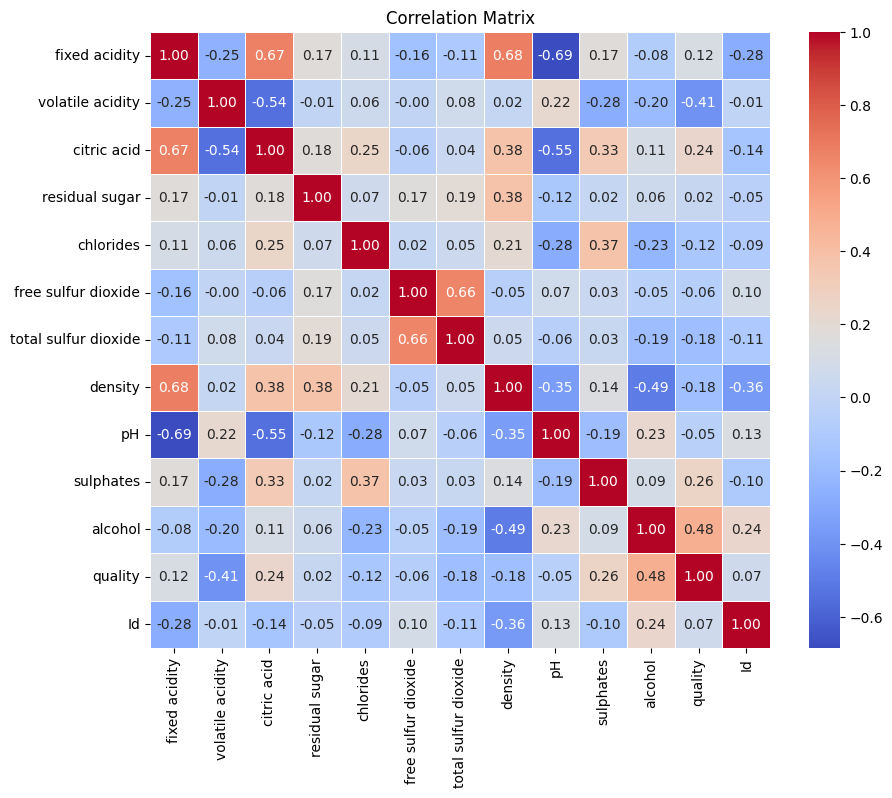

In [12]:
# Data Visualization
# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Total count of residual sugar

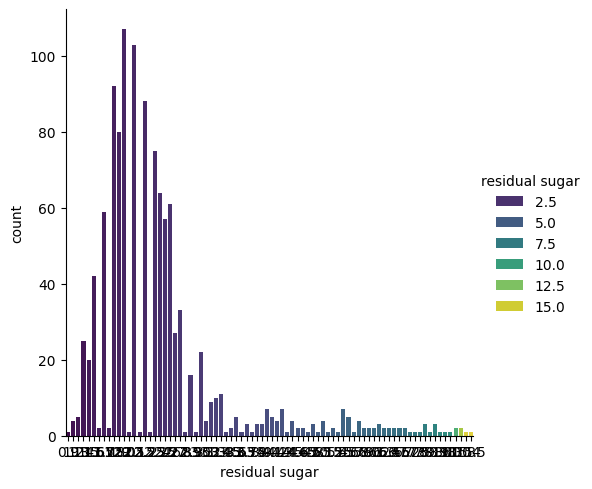

In [29]:
sns.catplot(x='residual sugar', hue= 'residual sugar', data=data, kind='count', palette='viridis')

<Axes: xlabel='quality', ylabel='volatile acidity'>

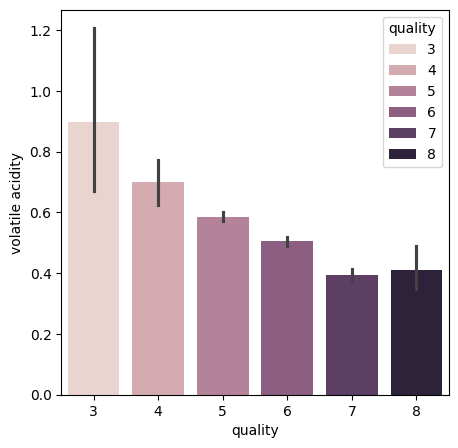

In [17]:
#acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', hue= 'quality', data=data)

<Axes: xlabel='citric acid', ylabel='volatile acidity'>

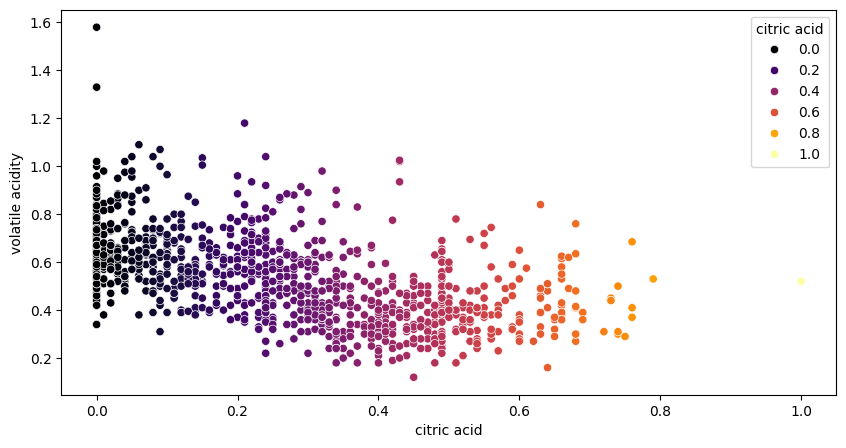

In [36]:
#acidity vs citric acid
plot = plt.figure(figsize=(10,5))
sns.scatterplot(x='citric acid', y='volatile acidity', hue= 'citric acid', data=data, palette='inferno')